In [46]:
# 1. Cargar datos
import pandas as pd

#URL del dataset
url = "https://raw.githubusercontent.com/musanchez/CP2-Datos/main/Sales.csv"

#Cargar el dataset
df = pd.read_csv(url)

display(df.head())


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [47]:
# Paso 2: Exploración inicial
# Exploración básica

# Ventas por país y estado

sales_country_state = df.groupby(['Country', 'State'])['Revenue'].sum().reset_index()

sales_country_state = sales_country_state.sort_values(by='Revenue', ascending=False)

display(sales_country_state.head(10))

# Ventas por género

sales_gender = df.groupby('Customer_Gender')['Revenue'].sum().reset_index()

display(sales_gender)


,Country,State,Revenue
33,United States,California,17672620
30,United Kingdom,England,10646196
0,Australia,New South Wales,9203495
6,Canada,British Columbia,7877890
51,United States,Washington,6741510
1,Australia,Queensland,5066267
4,Australia,Victoria,5054839
46,United States,Oregon,3450410
27,Germany,Hessen,2073391
29,Germany,Saarland,2029545


,Customer_Gender,Revenue
0,F,41935599
1,M,43335409


In [48]:
# Ventas por producto
sales_product = df.groupby('Product')['Revenue'].sum().reset_index()
#Ahora los ordenamos
sales_product = sales_product.sort_values(by='Revenue', ascending=False)

display(sales_product.head(10))

# Número de ventas por producto (frecuencia)

sales_product_count = df['Product'].value_counts().reset_index()

display(sales_product_count.head(10))


,Product,Revenue
61,"Road-150 Red, 62",3829416
32,"Mountain-200 Black, 38",3366248
59,"Road-150 Red, 52",3180840
60,"Road-150 Red, 56",3158805
36,"Mountain-200 Silver, 42",3081078
35,"Mountain-200 Silver, 38",3035442
58,"Road-150 Red, 48",2965309
34,"Mountain-200 Black, 46",2769620
33,"Mountain-200 Black, 42",2641606
37,"Mountain-200 Silver, 46",2376146


,Product,count
0,Water Bottle - 30 oz.,10794
1,Patch Kit/8 Patches,10416
2,Mountain Tire Tube,6816
3,AWC Logo Cap,4358
4,"Sport-100 Helmet, Red",4220
5,Road Tire Tube,4176
6,"Sport-100 Helmet, Black",4152
7,Fender Set - Mountain,4032
8,"Sport-100 Helmet, Blue",3788
9,Touring Tire Tube,3702


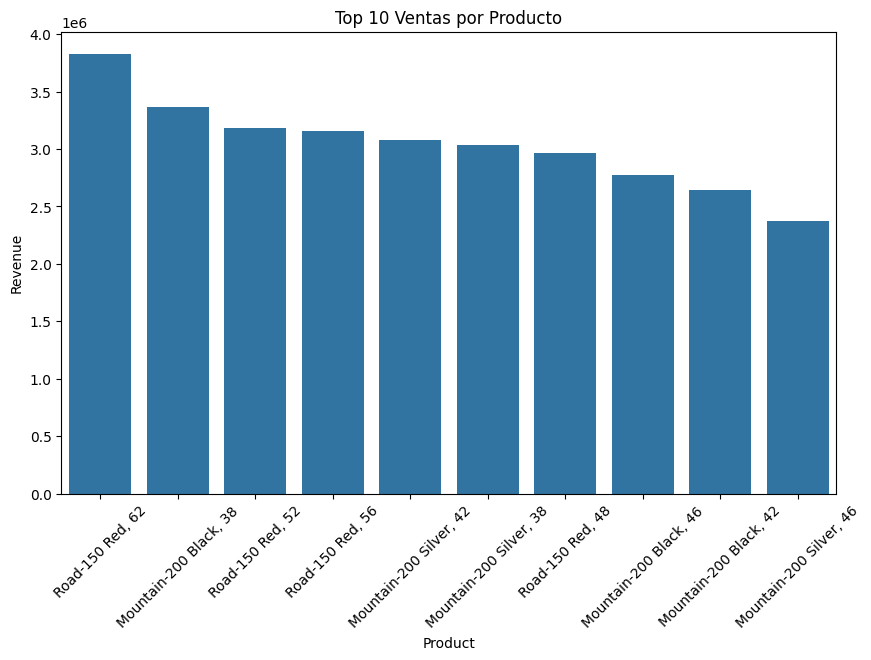

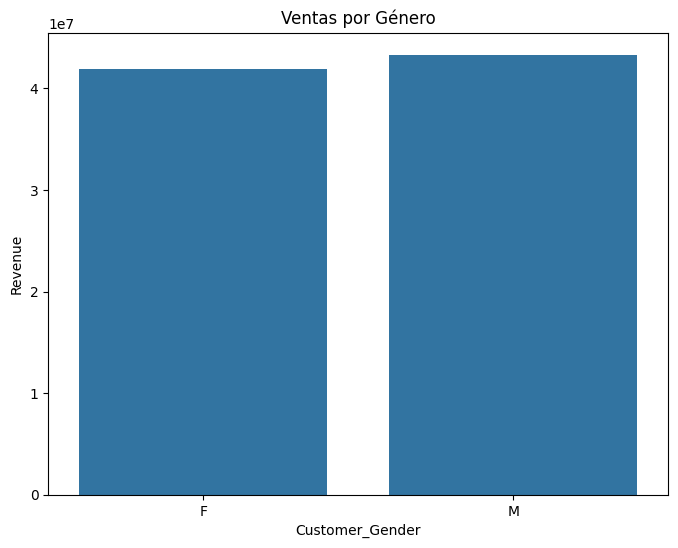

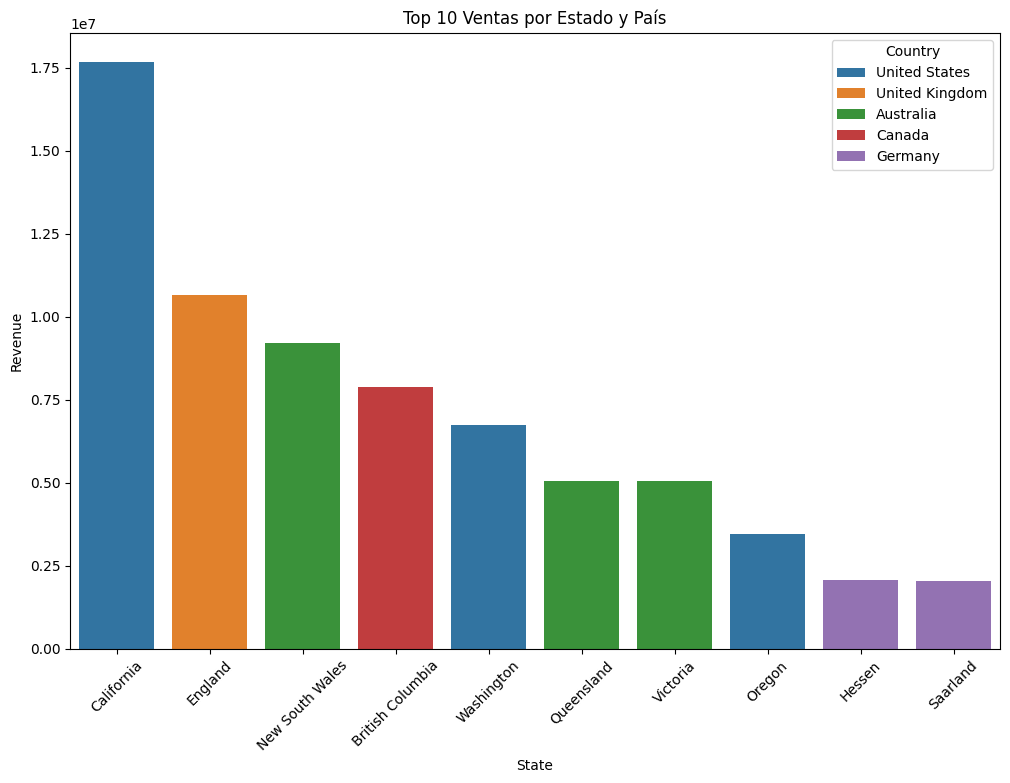

In [49]:
#Visualización de datos, con algunos gráficos

import matplotlib.pyplot as plt
import seaborn as sns

#Grafico de ventas por género
plt.figure(figsize=(10,6))
sns.barplot(data=sales_product.head(10), x='Product', y='Revenue')
plt.title('Top 10 Ventas por Producto')
plt.xticks(rotation=45)
plt.show()

# Gráfico 2: Ventas por género
plt.figure(figsize=(8,6))
sns.barplot(data=sales_gender, x='Customer_Gender', y='Revenue')
plt.title('Ventas por Género')
plt.show()

# Gráfico 3: Ventas por país y estado (Top 10)
plt.figure(figsize=(12,8))
sns.barplot(data=sales_country_state.head(10), x='State', y='Revenue', hue='Country')
plt.title('Top 10 Ventas por Estado y País')
plt.xticks(rotation=45)
plt.show()

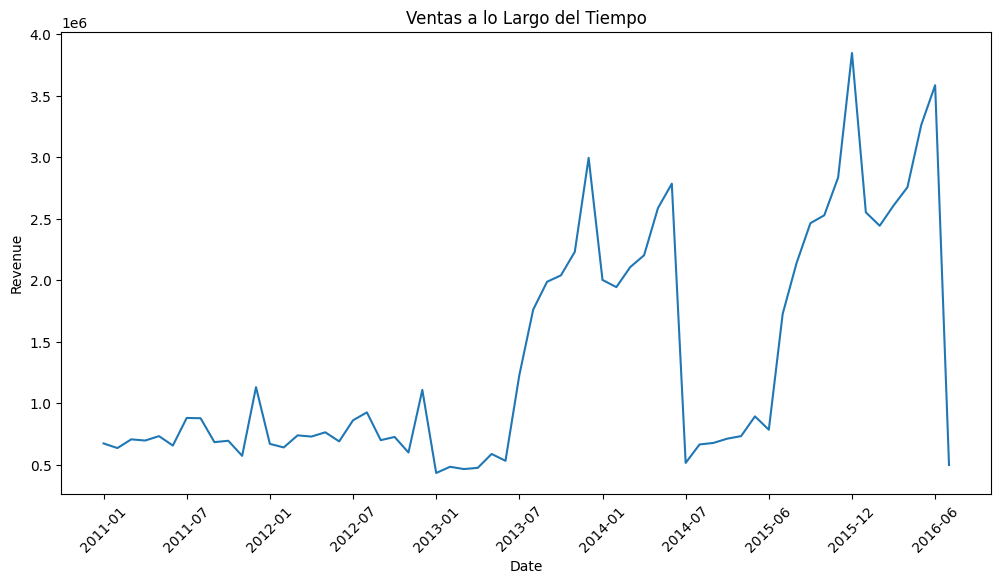

In [50]:
df['Date'] = pd.to_datetime(df['Date'])

# Agrupar las ventas por mes y año
sales_over_time = df.groupby(df['Date'].dt.to_period('M'))['Revenue'].sum().reset_index()

# Graficar las ventas a lo largo del tiempo
plt.figure(figsize=(12,6))
sales_over_time['Date'] = sales_over_time['Date'].astype(str)
sns.lineplot(data=sales_over_time, x='Date', y='Revenue')
plt.xticks(ticks=range(0, len(sales_over_time), 6), rotation=45) 
plt.title('Ventas a lo Largo del Tiempo')
plt.show()

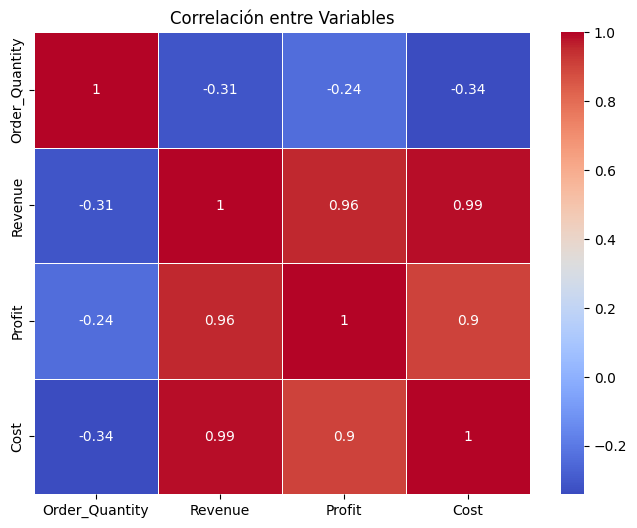

In [51]:
# Calcular la correlación entre variables numéricas
corr_matrix = df[['Order_Quantity', 'Revenue', 'Profit', 'Cost']].corr()

# Graficar el heatmap de la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlación entre Variables')
plt.show()


In [52]:
# 3. Limpieza de datos

# Paso 1: Identificar y manejar datos faltantes
missing_values = df.isnull().sum() 
display(missing_values[missing_values > 0])

#Retorna vacío, no hay datos faltantes

Series([], dtype: int64)

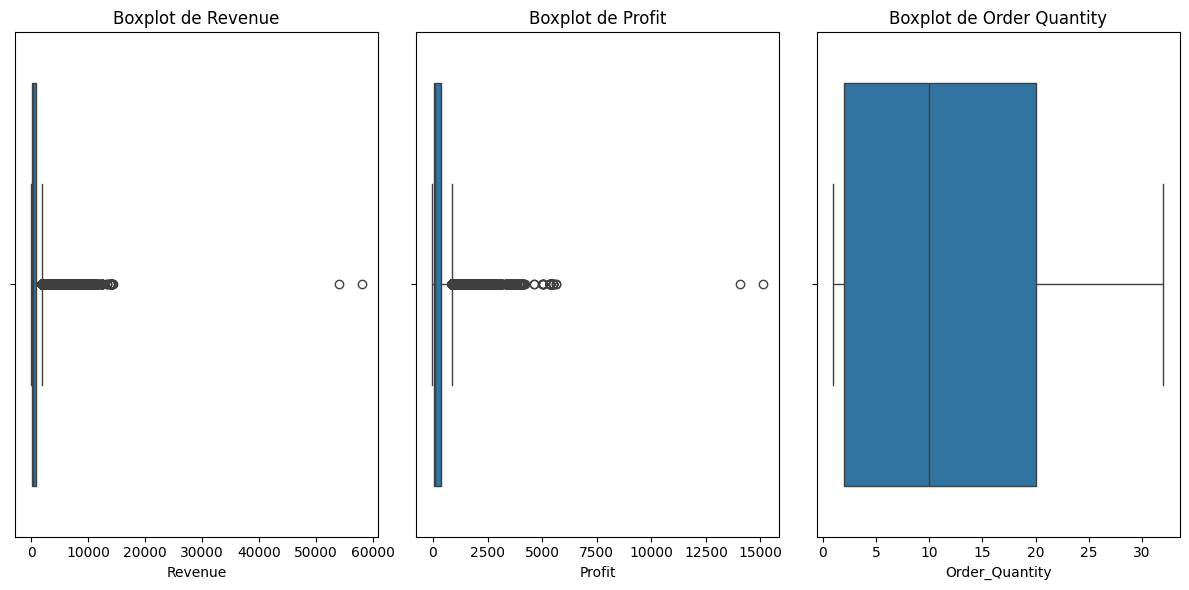

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,110007,110007.000000,110007.000000,110007.000000,110007.000000,110007.000000,110007.000000,110007.000000,110007.000000,110007.000000
mean,2014-12-01 17:11:44.017017088,15.662912,2014.424218,35.927705,12.152163,229.339387,388.965284,231.464652,365.598135,597.062787
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-26 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,28.000000,27.000000,61.000000
50%,2014-06-26 00:00:00,16.000000,2014.000000,35.000000,11.000000,9.000000,24.000000,91.000000,98.000000,206.000000
75%,2016-01-10 00:00:00,23.000000,2016.000000,43.000000,20.000000,38.000000,55.000000,330.000000,377.000000,738.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,1636.000000,3249.000000,4593.000000
std,NaN,8.783379,1.239115,11.042550,9.563190,501.809717,841.913130,295.388159,574.745603,838.348464


In [53]:
# 4. Manejo de Outliers
from scipy import stats
import numpy as np
# Paso 1: Detección de outliers con boxplot en variables relevantes
plt.figure(figsize=(12,6))

# Boxplot para Revenue
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Revenue'])
plt.title('Boxplot de Revenue')

# Boxplot para Profit
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Profit'])
plt.title('Boxplot de Profit')

# Boxplot para Order_Quantity
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Order_Quantity'])
plt.title('Boxplot de Order Quantity')

plt.tight_layout()
plt.show()

# Paso 2: Eliminar outliers usando Z-score (más de 3 desviaciones estándar)
from scipy import stats

# Eliminar outliers en las tres variables mencionadas
df_no_outliers = df[
    (np.abs(stats.zscore(df['Revenue'])) < 3) &
    (np.abs(stats.zscore(df['Profit'])) < 3) &
    (np.abs(stats.zscore(df['Order_Quantity'])) < 3)
]

# Mostrar los datos después de eliminar outliers
df_no_outliers.describe()


In [54]:
# 5. Transformación de Variables

from sklearn.preprocessing import StandardScaler, MinMaxScaler

df_no_outliers_copy = df_no_outliers.copy()

# Paso 1: Estandarización (Z-score) para Revenue, Profit y Order_Quantity
scaler = StandardScaler()
df_no_outliers_copy['Revenue_scaled'] = scaler.fit_transform(df_no_outliers[['Revenue']])
df_no_outliers_copy['Profit_scaled'] = scaler.fit_transform(df_no_outliers[['Profit']])
df_no_outliers_copy['Order_Quantity_scaled'] = scaler.fit_transform(df_no_outliers[['Order_Quantity']])

# Paso 2: Normalización (Min-Max Scaling) para Revenue, Profit y Order_Quantity
min_max_scaler = MinMaxScaler()
df_no_outliers_copy['Revenue_normalized'] = min_max_scaler.fit_transform(df_no_outliers[['Revenue']])
df_no_outliers_copy['Profit_normalized'] = min_max_scaler.fit_transform(df_no_outliers[['Profit']])
df_no_outliers_copy['Order_Quantity_normalized'] = min_max_scaler.fit_transform(df_no_outliers[['Order_Quantity']])

# Mostrar las primeras filas de las columnas originales, escaladas y normalizadas
df_no_outliers_copy[['Revenue', 'Revenue_scaled', 'Revenue_normalized', 'Profit', 'Profit_scaled', 'Profit_normalized', 'Order_Quantity', 'Order_Quantity_scaled', 'Order_Quantity_normalized']].head()


,Revenue,Revenue_scaled,Revenue_normalized,Profit,Profit_scaled,Profit_normalized,Order_Quantity,Order_Quantity_scaled,Order_Quantity_normalized
0,950,0.420993,0.206491,590,1.213782,0.372149,8,-0.434184,0.225806
1,950,0.420993,0.206491,590,1.213782,0.372149,8,-0.434184,0.225806
2,2401,2.151785,0.522544,1366,3.840846,0.837935,23,1.134338,0.709677
3,2088,1.778430,0.454367,1188,3.238247,0.731092,20,0.820633,0.612903
4,418,-0.213591,0.090612,238,0.022125,0.160864,4,-0.852456,0.096774


In [55]:
# 6. Ingeniería de características
display(df[df['Unit_Price'] * df['Order_Quantity'] != df['Revenue']])
display(df[df['Unit_Price'] * df['Order_Quantity'] == df['Revenue']])

# El revenue no siempre es igual al producto de la cantidad por el precio unitario, por lo que se puede crear una nueva variable que sea la diferencia entre el revenue y el producto de la cantidad por el precio unitario

df_no_outliers_copy['Revenue_Diff'] = df_no_outliers_copy['Revenue'] - df_no_outliers_copy['Unit_Price'] * df_no_outliers_copy['Order_Quantity']
df_no_outliers_copy[df_no_outliers_copy['Revenue_Diff'] > 0][['Unit_Price', 'Order_Quantity', 'Revenue', 'Revenue_Diff']]
# Solo verificamos que la diferencia no es mayor que 0 en ningun caso. Hay cargos, o costos ocultos, se corrió antes de la línea de código que puse luego.

df_no_outliers_copy['Profit_margin'] = df_no_outliers_copy['Profit'] / df_no_outliers_copy['Revenue'] #El margen de ganancias puede ser una variable interesante para analizar. Un producto puede tener un alto revenue pero un margen de ganancias bajo.






,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
266,2013-12-17,17,December,2013,24,Youth (<25),F,Canada,Alberta,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,300,180,480
267,2015-12-17,17,December,2015,24,Youth (<25),F,Canada,Alberta,Accessories,Bike Racks,Hitch Rack - 4-Bike,6,45,120,450,270,720
428,2014-03-28,28,March,2014,54,Adults (35-64),F,Canada,Alberta,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,525,315,840
429,2016-03-28,28,March,2016,54,Adults (35-64),F,Canada,Alberta,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,375,225,600
1211,2016-07-09,9,July,2016,65,Seniors (64+),M,Canada,British Columbia,Accessories,Bottles and Cages,Mountain Bottle Cage,3,4,10,18,12,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108262,2014-07-18,18,July,2014,23,Youth (<25),M,United Kingdom,England,Accessories,Tires and Tubes,Touring Tire Tube,1,2,5,3,2,5
108264,2016-07-18,18,July,2016,23,Youth (<25),M,United Kingdom,England,Accessories,Tires and Tubes,Touring Tire Tube,1,2,5,3,2,5
108356,2015-10-10,10,October,2015,55,Adults (35-64),M,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,1,1,2,1,1,2
110348,2014-06-30,30,June,2014,39,Adults (35-64),F,Canada,Alberta,Bikes,Touring Bikes,"Touring-1000 Blue, 46",1,1482,2384,902,1482,2384


In [56]:
# Aplicar One-Hot Encoding con drop_first=True
df_no_outliers_copy = pd.get_dummies(df_no_outliers_copy, columns=['Product_Category', 'Sub_Category', 'Country'], drop_first=True)
# Mostrar las primeras filas
df_no_outliers_copy.head()


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,State,Product,Order_Quantity,...,Sub_Category_Shorts,Sub_Category_Socks,Sub_Category_Tires and Tubes,Sub_Category_Touring Bikes,Sub_Category_Vests,Country_Canada,Country_France,Country_Germany,Country_United Kingdom,Country_United States
0,2013-11-26,26,November,2013,19,Youth (<25),M,British Columbia,Hitch Rack - 4-Bike,8,...,False,False,False,False,False,True,False,False,False,False
1,2015-11-26,26,November,2015,19,Youth (<25),M,British Columbia,Hitch Rack - 4-Bike,8,...,False,False,False,False,False,True,False,False,False,False
2,2014-03-23,23,March,2014,49,Adults (35-64),M,New South Wales,Hitch Rack - 4-Bike,23,...,False,False,False,False,False,False,False,False,False,False
3,2016-03-23,23,March,2016,49,Adults (35-64),M,New South Wales,Hitch Rack - 4-Bike,20,...,False,False,False,False,False,False,False,False,False,False
4,2014-05-15,15,May,2014,47,Adults (35-64),F,New South Wales,Hitch Rack - 4-Bike,4,...,False,False,False,False,False,False,False,False,False,False


In [59]:
#7. Análsis comparativo

display(df.describe())
display(df_no_outliers_copy.describe())


,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2014-11-23 12:14:55.063519232,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,2013-12-22 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,2014-06-27 00:00:00,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,2016-01-09 00:00:00,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000
std,NaN,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674


,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Revenue_scaled,Profit_scaled,Order_Quantity_scaled,Revenue_normalized,Profit_normalized,Order_Quantity_normalized,Revenue_Diff,Profit_margin
count,110007,110007.000000,110007.000000,110007.000000,110007.000000,110007.000000,110007.000000,110007.000000,110007.000000,110007.000000,1.100070e+05,1.100070e+05,1.100070e+05,110007.000000,110007.000000,110007.000000,110007.000000,110007.000000
mean,2014-12-01 17:11:44.017017088,15.662912,2014.424218,35.927705,12.152163,229.339387,388.965284,231.464652,365.598135,597.062787,4.547184e-17,-1.240141e-17,-9.094368e-17,0.129615,0.156942,0.359747,-71.172334,0.475913
min,2011-01-01 00:00:00,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000,-7.098069e-01,-8.851602e-01,-1.166160e+00,0.000000,0.000000,0.000000,-1225.000000,-0.037037
25%,2013-12-26 00:00:00,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,28.000000,27.000000,61.000000,-6.394301e-01,-6.888075e-01,-1.061592e+00,0.012851,0.034814,0.032258,-66.000000,0.365059
50%,2014-06-26 00:00:00,16.000000,2014.000000,35.000000,11.000000,9.000000,24.000000,91.000000,98.000000,206.000000,-4.664702e-01,-4.755278e-01,-1.204795e-01,0.044435,0.072629,0.322581,-14.000000,0.531915
75%,2016-01-10 00:00:00,23.000000,2016.000000,43.000000,20.000000,38.000000,55.000000,330.000000,377.000000,738.000000,1.681137e-01,3.335807e-01,8.206333e-01,0.160314,0.216086,0.612903,-3.000000,0.597315
max,2016-07-31 00:00:00,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,1636.000000,3249.000000,4593.000000,4.766461e+00,4.754902e+00,2.075450e+00,1.000000,1.000000,1.000000,0.000000,0.750000
std,NaN,8.783379,1.239115,11.042550,9.563190,501.809717,841.913130,295.388159,574.745603,838.348464,1.000005e+00,1.000005e+00,1.000005e+00,0.182607,0.177304,0.308490,143.276190,0.164058


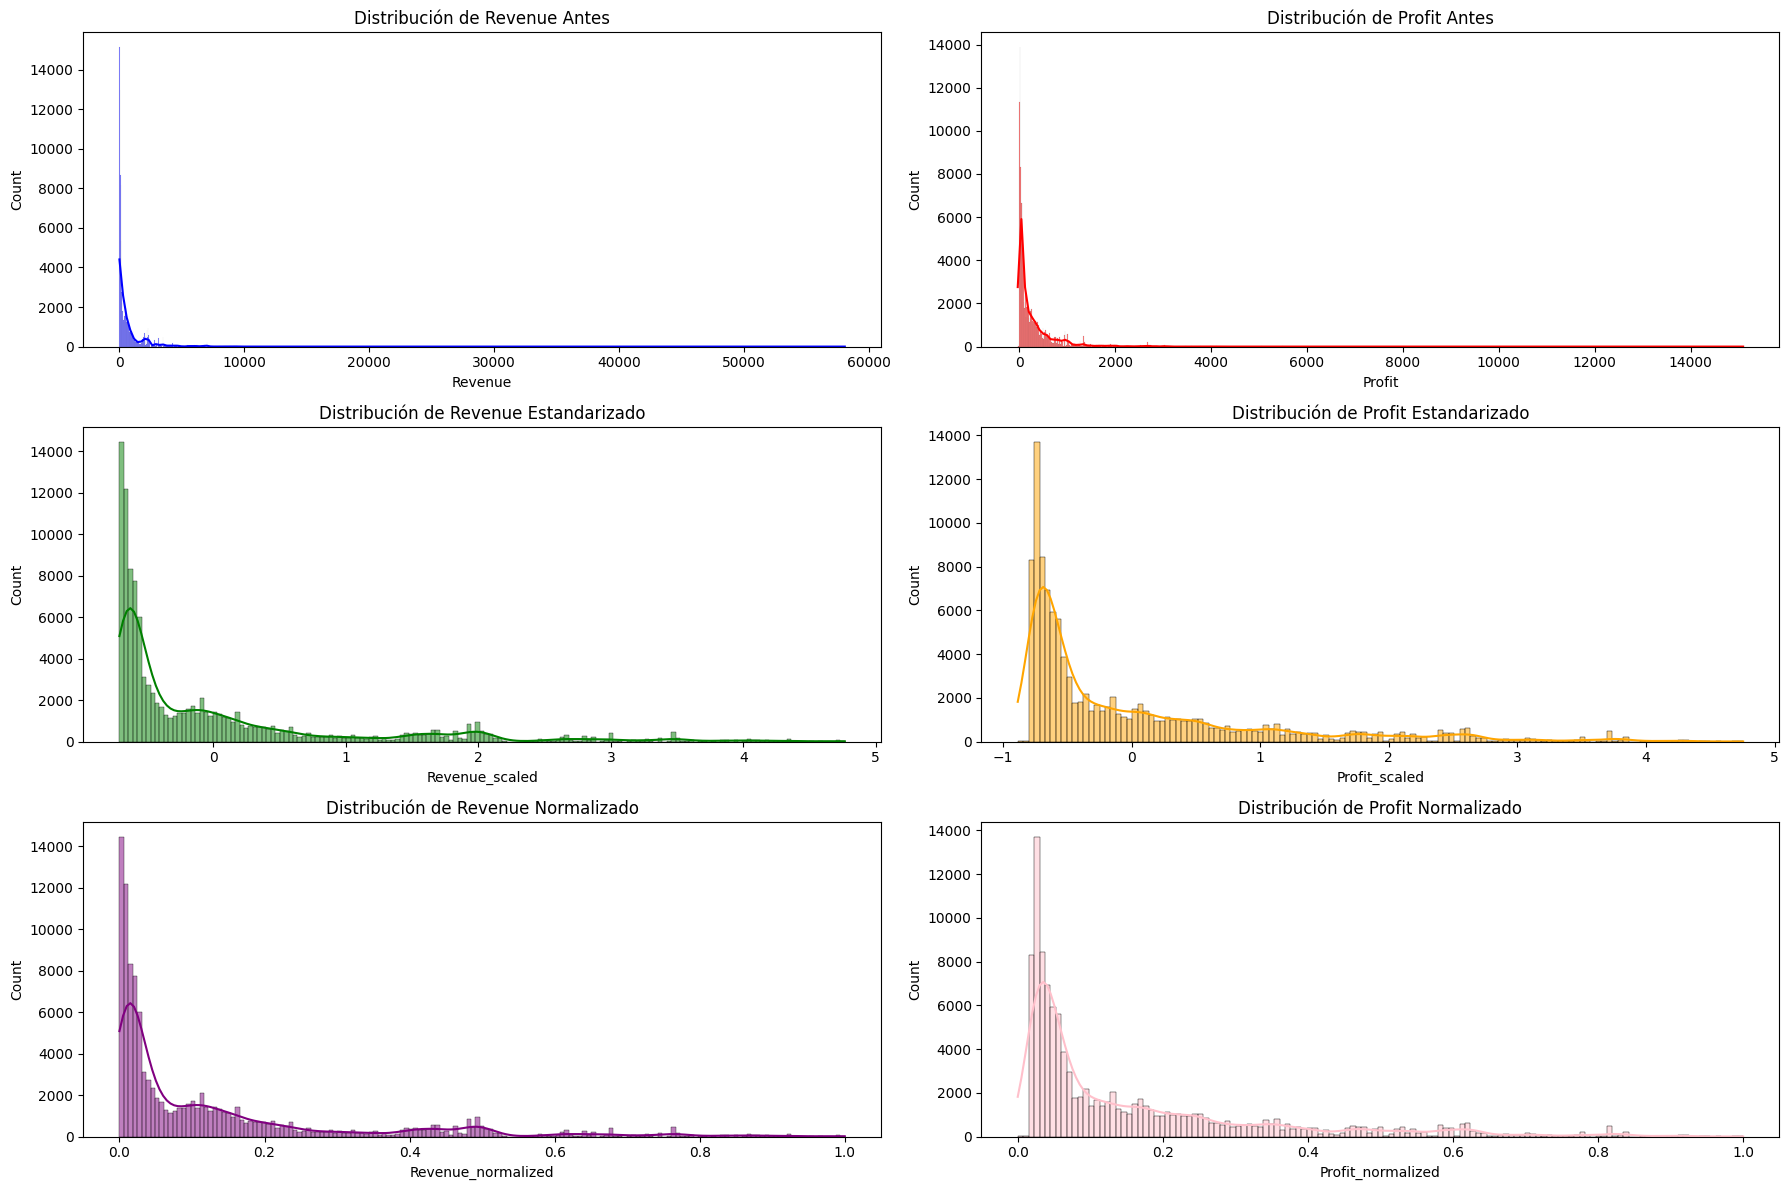

In [63]:
#8 Documentación y comparación de los resultados

stats_before = df[['Revenue', 'Profit', 'Order_Quantity']].describe()
stats_after = df_no_outliers_copy[['Revenue', 'Profit', 'Order_Quantity', 'Revenue_scaled', 'Profit_scaled', 'Order_Quantity_scaled', 'Revenue_normalized', 'Profit_normalized', 'Order_Quantity_normalized']].describe()

plt.figure(figsize=(18,12))

# Distribución de Revenue antes, estandarizado y normalizado
plt.subplot(3, 2, 1)
sns.histplot(df['Revenue'], kde=True, color='blue')
plt.title('Distribución de Revenue Antes')

plt.subplot(3, 2, 3)
sns.histplot(df_no_outliers_copy['Revenue_scaled'], kde=True, color='green')
plt.title('Distribución de Revenue Estandarizado')

plt.subplot(3, 2, 5)
sns.histplot(df_no_outliers_copy['Revenue_normalized'], kde=True, color='purple')
plt.title('Distribución de Revenue Normalizado')

# Distribución de Profit antes, estandarizado y normalizado
plt.subplot(3, 2, 2)
sns.histplot(df['Profit'], kde=True, color='red')
plt.title('Distribución de Profit Antes')

plt.subplot(3, 2, 4)
sns.histplot(df_no_outliers_copy['Profit_scaled'], kde=True, color='orange')
plt.title('Distribución de Profit Estandarizado')

plt.subplot(3, 2, 6)
sns.histplot(df_no_outliers_copy['Profit_normalized'], kde=True, color='pink')
plt.title('Distribución de Profit Normalizado')

plt.tight_layout()
plt.show()